In [73]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1
1. Implement the formula

In [74]:
def convert_scale(l, h, values):
    return (values - l) / (h - l)

2. Use the formula to squeeze certain values

In [75]:
def generate_random_float(min_val: float, max_val: float, size: int = 1, seed: int = None) -> np.ndarray:
    """
    Generate random floating point numbers between min_val and max_val
    
    Args:
        min_val (float): Minimum value of range
        max_val (float): Maximum value of range
        size (int): Number of random values to generate
        seed (int): Random seed for reproducibility
        
    Returns:
        np.ndarray: Array of random floats
    """
    if seed is not None:
        np.random.seed(seed)
    
    random_nums = np.random.uniform(low=min_val, high=max_val, size=size)
    return random_nums if size > 1 else random_nums[0]

In [76]:
l = -100
h = 100
num_vals = 50
random_seed = 0
values = generate_random_float(l, h, num_vals, random_seed)
print(f"____ Before squeeze ____\n")
print(values)
print(f"\n____ After squeeze ____\n")
print(convert_scale(l, h, values))

____ Before squeeze ____

[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
  29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623
  58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
 -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965
  95.72366845  59.83171284  -7.70412755  56.10583526 -76.34511483
  27.98420427 -71.32934252  88.93378341   4.36966435 -17.067612
 -47.08887758  54.84673789  -8.76993356  13.68678977 -96.24203991
  23.52709942  22.41914454  23.38679937  88.7496157   36.36405982
 -28.09841989 -12.59360924  39.52623919 -87.95490567  33.35334309
  34.12757392 -57.92348779 -74.21474047 -36.91432982 -27.25784581]

____ After squeeze ____

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.6399210

3. The formula converts the old range of values to a new range of values which is between $0$ and $1$

## Task 2

### 1. We can modify this formula as follows:

$\text{normalized value}, n = \frac{c - l}{h-l}$

$\text{new value,} v = \text{new min}+ (\text{new max} - \text{new min})\times n$

### 2. Python code

In [77]:
def convert_scale(old_min, old_max, values, new_min=0, new_max=1):
    """
    Convert values from one range to another
    Args:
        old_min (float): Original minimum value
        old_max (float): Original maximum value
        values (np.ndarray): Input values to rescale
        new_min (float): Target minimum value
        new_max (float): Target maximum value
    Returns:
        np.ndarray: Rescaled values
    """
    # First normalize to [0,1]
    normalized = (values - old_min) / (old_max - old_min)
    # Then scale to new range
    return new_min + (new_max - new_min) * normalized

For example, say old range was between [0,255] (e.g for an image)

We want the new range to be between [-100, 100], then applying the new formula we have

In [78]:
# Function to generate random int8 values between 0 and 255
def generate_random_int8(size: int = 1, seed: int = None) -> np.ndarray:
    """
    Generate random int8 values between 0 and 255
    
    Args:
        size (int): Number of random values to generate
        seed (int): Random seed for reproducibility
        
    Returns:
        np.ndarray: Array of random int8 values
    """
    if seed is not None:
        np.random.seed(seed)
    
    random_ints = np.random.randint(low=0, high=256, size=size, dtype=np.uint8)
    return random_ints if size > 1 else random_ints[0]

In [79]:
# Test with array of values
values = generate_random_int8(num_vals, random_seed)
# Convert from range [0,255] to range [-1,1]
print(f"____ Before scale ____\n")
print(values)
print(f"\n____ After scale ____\n")
scaled = convert_scale(0, 255, values, -100, 100)
print(scaled)

____ Before scale ____

[172  10 127 140  47 170 196 151 117 166  22 183 192 204  33 216  67 179
  78 154 251  82 162 219 195 118 125 139 103 125 229 216   9 164 116 108
 211 222 161 159  21  81  89 165 242 214 102  98  36 183]

____ After scale ____

[ 34.90196078 -92.15686275  -0.39215686   9.80392157 -63.1372549
  33.33333333  53.7254902   18.43137255  -8.23529412  30.19607843
 -82.74509804  43.52941176  50.58823529  60.         -74.11764706
  69.41176471 -47.45098039  40.39215686 -38.82352941  20.78431373
  96.8627451  -35.68627451  27.05882353  71.76470588  52.94117647
  -7.45098039  -1.96078431   9.01960784 -19.21568627  -1.96078431
  79.60784314  69.41176471 -92.94117647  28.62745098  -9.01960784
 -15.29411765  65.49019608  74.11764706  26.2745098   24.70588235
 -83.52941176 -36.47058824 -30.19607843  29.41176471  89.80392157
  67.84313725 -20.         -23.1372549  -71.76470588  43.52941176]


### 3. Problem with this approach

In [80]:
print(values.dtype)
print(scaled.dtype)

uint8
float64


Problem begins when we try to do the opposite, i.e `fp32` to `int8`

In [81]:
l = -100
h = 100
num_vals = 50
random_seed = 0
values = generate_random_float(l, h, num_vals, random_seed)
print(values.dtype)
print(f"____ Before scale conversion ____\n")
print(values)
print(f"\n____ After scale conversion ____\n")
scaled = convert_scale(l, h, values, 0, 255)
print(scaled)
print(scaled.dtype)

float64
____ Before scale conversion ____

[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
  29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623
  58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
 -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965
  95.72366845  59.83171284  -7.70412755  56.10583526 -76.34511483
  27.98420427 -71.32934252  88.93378341   4.36966435 -17.067612
 -47.08887758  54.84673789  -8.76993356  13.68678977 -96.24203991
  23.52709942  22.41914454  23.38679937  88.7496157   36.36405982
 -28.09841989 -12.59360924  39.52623919 -87.95490567  33.35334309
  34.12757392 -57.92348779 -74.21474047 -36.91432982 -27.25784581]

____ After scale conversion ____

[139.9474435  182.37328842 153.7046609  138.94521166 108.03197383
 164.70299883 111.58473887 227.4021152  245.73400393  97.7775873
 201.88988471 134.86820454 144.85136308 236.02714276  18.11419484
  22.21797142   5.15569135 212.31806061 198.42997149 221.8530978
 

### Problem 1: Resulting values are not in `int8` if we do not round off to the nearest integer. We are also not computing in int 8 if the conversion is imperfect. The arithmetic inside the GPU may happen in higher precision and then the results may be converted back to a quantized format

### 4. (Bonus) Even a few outliers in our dataset can mess up our scaling 

Consider the following values

In [82]:
values = generate_random_float(l, h, num_vals, 10)
print(values.dtype)
print(values)

float64
[ 54.26412865 -95.84961013  26.72964699  49.76077651  -0.29859754
 -55.04067089 -60.38742705  52.10614244 -66.17783269 -82.33203717
  37.07196367  90.67866924 -99.21034673   2.43845268  62.52419233
  22.50521337  44.35106349 -41.62478637  83.5548245   42.91515668
   8.5088736  -71.56599048 -25.33184799  34.82672301 -11.63336512
 -13.19720133  23.55339569   2.62764851  30.07943639  20.20779068
  61.04463937   4.32943048  81.72977616 -36.1527822  -81.90813015
 -39.85998867 -77.20312763  65.73626526 -90.62073612  25.25742966
   9.51723118  63.85739913 -60.21049206  71.37006049 -29.66947211
  50.92953831 -40.80765862  76.78729591 -34.89767243 -66.99682046]


Since we are generating the numbers in `fp64` range, the possible values can be between ~$2.22507 \times 10^{-324}$ and ~$1.79769 \times 10^{308}$ [(see)](https://en.wikipedia.org/wiki/IEEE_754)
However since we set $l=-100$ and $h=100$, we have an idea about our input distribution, thus we know values are bounded between $l$ and $h$

Let's plot the values to see what's going on

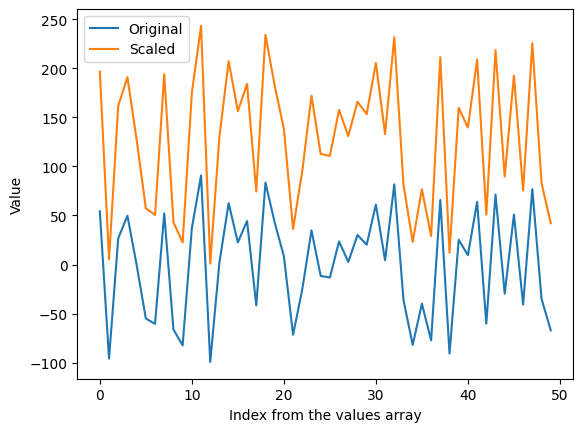

In [83]:
plt.plot(values, label='Original')
plt.plot(convert_scale(l, h, values, 0, 255), label='Scaled')
plt.legend()
plt.xlabel('Index from the values array')
plt.ylabel('Value')
plt.show()

The general shape of the distribution is retained. Now consider some anomalies

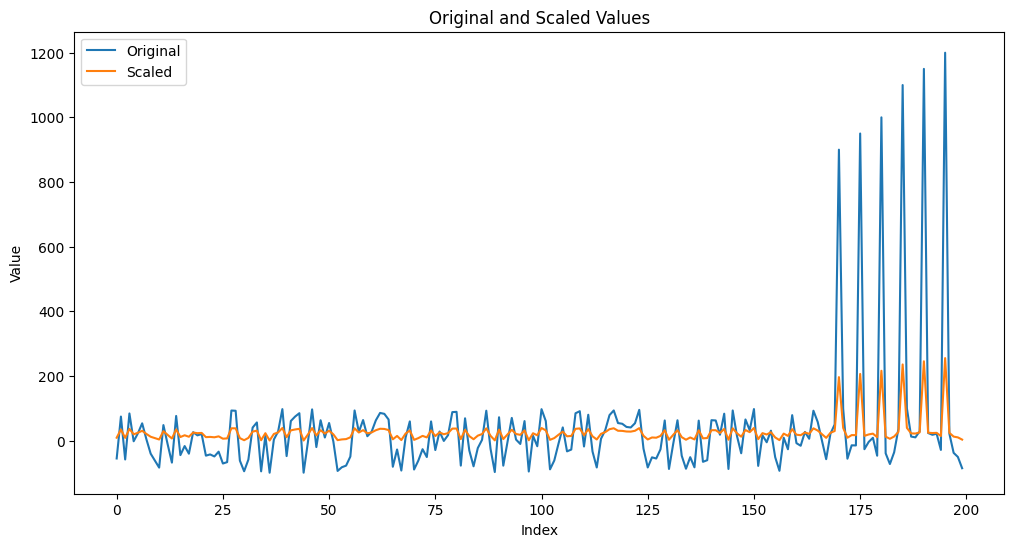

In [88]:
l = -100
h = 100
num_vals = 200
values = generate_random_float(l, h, num_vals, 5)

# Add some outliers
values[170] = 900
values[175] = 950
values[180] = 1000
values[185] = 1100
values[190] = 1150
values[195] = 1200

# Scale values to [0,255]
scaled_values = convert_scale(l, 1200, values, 0, 255) # as new highest possible value is 1200

# Plot original and scaled values
plt.figure(figsize=(12, 6))
plt.plot(values, label='Original')
plt.plot(scaled_values, label='Scaled')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original and Scaled Values')
plt.show()


In [89]:
print(f"____ Before scale conversion ____\n")
print(values[:50])
print(f"\n___values 160 to 200___\n")
print(values[160:])

____ Before scale conversion ____

[-55.60136578  74.14646124 -58.65616893  83.72218159  -2.31776224
  22.34877258  53.1815713    3.68359757 -40.63989968 -62.45575427
 -83.85174625  47.68805924 -11.73815542 -68.33802646  75.98740624
 -45.1827076  -17.15299618 -40.78401345  25.75758178  15.96756204
  19.98583932 -46.83617649 -43.06282387 -49.28235885 -34.48721046
 -71.16713987 -66.87742776  92.78610581  92.04534306 -62.31706888
 -95.13868767 -59.08889072  39.96872283  55.90291711 -95.41338151
  15.53257163 -99.67156546   3.09452238  27.95903523  97.12488056
 -48.18048072  60.49937705  74.0966174   84.54992279 -99.55715749
  -6.10232565  96.29374752 -20.21103922  62.74649552   9.29129959]

___values 160 to 200___

[-8.13088105e+00 -1.62691800e+01  2.65811082e+01  5.43576659e+00
  9.22422280e+01  5.78020229e+01 -6.60898175e-01 -5.77717998e+01
  2.07968282e+01  4.97151621e+01  9.00000000e+02  9.87008016e+01
 -5.63004437e+01 -1.48725333e+01 -1.52300794e+01  9.50000000e+02
 -2.69333962e+01 -

In [90]:
print(f"\n____ After scale conversion ____\n")
print(scaled_values[:50])


____ After scale conversion ____

[ 8.70896287 34.15949817  8.10975148 36.03781254 19.16074664 23.99918231
 30.04715437 20.33793645 11.64371198  7.3644482   3.16754208 28.96958085
 17.31290028  6.21061789 34.52060661 10.75262274 16.25075844 11.61544351
 24.66783335 22.74748332 23.53568387 10.42828846 11.16844609  9.94846038
 12.85058564  5.65567641  6.49711994 37.81573614 37.67043268  7.39165187
  0.95356511  8.02487143 27.45540332 30.58095682  0.89968286 22.66215828
  0.0644237  20.22238708 25.09965691 38.66680349 10.16459801 31.48257011
 34.14972111 36.20017716  0.08686526 18.41838997 38.50377355 15.65091154
 31.92335104 21.43790877]


Comparison of the two cases, one with anomaly and one without

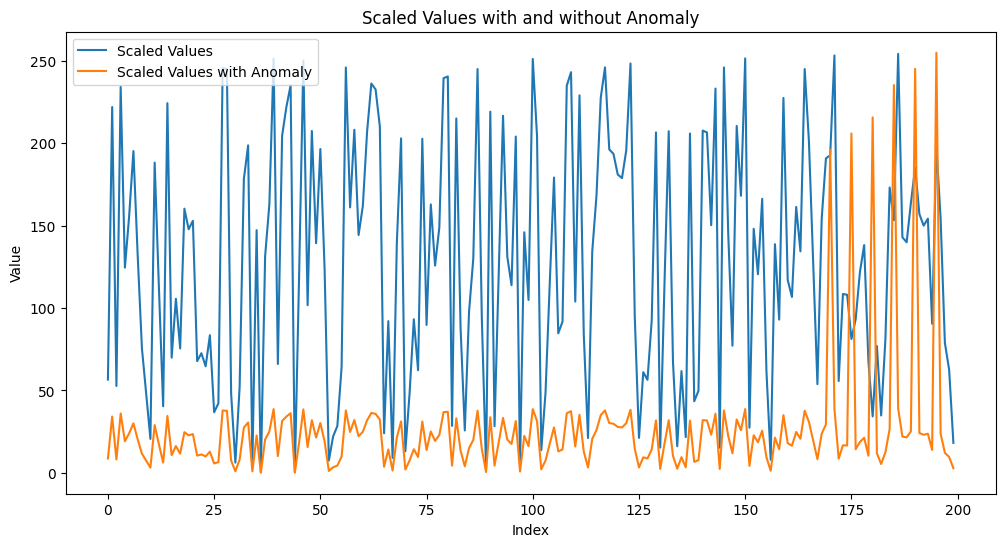

In [91]:
l = -100
h = 100
num_vals = 200
values_anomaly = generate_random_float(l, h, num_vals, 5)
values = generate_random_float(l, h, num_vals, 5)

# Add some outliers
values_anomaly[170] = 900
values_anomaly[175] = 950
values_anomaly[180] = 1000
values_anomaly[185] = 1100
values_anomaly[190] = 1150
values_anomaly[195] = 1200

# Scale values to [0,255]
scaled_values_with_anomaly = convert_scale(l, 1200, values_anomaly, 0, 255) # We need to change h to 1200
scaled_values = convert_scale(l, h, values, 0, 255)

# plot scaled values with anomaly and without anomaly
plt.figure(figsize=(12, 6))
plt.plot(scaled_values, label='Scaled Values')
plt.plot(scaled_values_with_anomaly, label='Scaled Values with Anomaly')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scaled Values with and without Anomaly')
plt.show()


In [94]:
# Find out what percentage of our new scaled values are lying between 0 and 50 and 50 and beyond
count_anomoloies = 0
count = 0
for i in range(0, 200):
    if scaled_values_with_anomaly[i] < 50:
        count_anomoloies += 1
    if scaled_values[i] < 50:
        count += 1
print(f"Percentage of values less than 50 in scaled values with anomaly: {count_anomoloies/256*100:.2f}%")
print(f"Percentage of values less than 50 in scaled values without anomaly: {count/256*100:.2f}%")

Percentage of values less than 50 in scaled values with anomaly: 75.78%
Percentage of values less than 50 in scaled values without anomaly: 14.45%


### We are not using the full dynamic range available to us

### Task 3

1. 0 point quantization for float range $[-10,10]$ and int range $[-127,127]$


The scale determines the step size for mapping floating-point values to integer values. It is calculated as:

$$
s = \frac{\text{max}_{\text{float}} - \text{min}_{\text{float}}}{\text{max}_{\text{int}} - \text{min}_{\text{int}}}
$$

Substitute the values:
$$
s = \frac{10 - (-10)}{127 - (-127)} = \frac{20}{254} \approx 0.07874
$$

---

#### 2. **Compute the Zero Point ($z$):**
The zero point aligns the floating-point value $0.0$ with an integer in the range $[-127, 127]$. It is calculated as:

$$
z = \text{round} \left( \frac{0.0 - \text{min}_{\text{float}}}{s} \right)
$$

Substitute the values:
$$
z = \text{round} \left( \frac{0.0 - (-10)}{0.07874} \right) = \text{round} \left( \frac{10}{0.07874} \right) = \text{round}(127.0) = 127
$$

---

- **Scale ($s$):** $0.07874$
- **Zero Point ($z$):** $127$

---

### **Example Quantization and Dequantization**

#### Quantize a floating-point value $x = 5.0$:
Use the formula:
$$
q = \text{round} \left( \frac{x}{s} \right) + z
$$

Substitute the values:
$$
q = \text{round} \left( \frac{5.0}{0.07874} \right) + 127 = \text{round}(63.5) + 127 = 64 + 127 = 191
$$

The quantized integer value is:
$$
q = 191
$$

---

## Since $191$ is out of our range of possible values, there's an information loss as we clip the value to $\text{max}_{\text{int}}$ i.e $127$

---

#### Dequantize $q = 127$ back to floating-point:
Use the formula:
$$
x \approx s \cdot (q - z)
$$

Substitute the values:
$$
x \approx 0.07874 \cdot (127 - 127) = 0
$$

The dequantized value is
$$
  0
$$

---

### Some ranges can not efficiently represent other ranges.
- **Scale ($s$)**: $0.07874$
- **Zero Point ($z$)**: $127$.
In this specific example $[-10,0]$ can be represented between $[0,127]$ however $[-127,0]$ is wasteful and $[1,10]$ all clip to the value $127$ which is $50%$ of our values, thus it is incredibly lossy

2. Python code for 0 point quantization

In [107]:
# python code for 0 point quantization
def zero_point_quantization(values, float_range, int_range):
    """
    Perform zero-point quantization on a set of values
    
    Args:
        values (np.ndarray): Input values to quantize
        float_range (Tuple[float, float]): Range of input values
        int_range (Tuple[int, int]): Range of quantized values
        
    Returns:
        np.ndarray: Quantized values
    """
    # Calculate the scale factor
    scale = (float_range[1] - float_range[0]) / (int_range[1] - int_range[0])
    # Calculate the zero-point
    zero_point = int_range[0]
    # Quantize the values
    quantized_values = zero_point + np.round((values - float_range[0]) / scale)
    # Clip values to the specified range
    quantized_values = np.clip(quantized_values, int_range[0], int_range[1])
    return quantized_values, zero_point, scale

In [109]:
# use the function to quantize the values
float_range_low = -100
float_range_high = 100
num_vals = 50
int_range_low = 0
int_range_high = 255
values = generate_random_float(l, h, num_vals, 0)
num_bits = 8
quantized_values, zero_point, scale = zero_point_quantization(values, (float_range_low,float_range_high), (int_range_low, int_range_high))
# Print the zero-point and step size
print(f"Zero-point: {zero_point}")
print(f"Step size: {scale}")
# print non quantized values
print(f"Non-quantized values: {values}")
# print the quantized values
print(f"Quantized values: {quantized_values}")

Zero-point: 0
Step size: 0.7843137254901961
Non-quantized values: [  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
  29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623
  58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
 -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965
  95.72366845  59.83171284  -7.70412755  56.10583526 -76.34511483
  27.98420427 -71.32934252  88.93378341   4.36966435 -17.067612
 -47.08887758  54.84673789  -8.76993356  13.68678977 -96.24203991
  23.52709942  22.41914454  23.38679937  88.7496157   36.36405982
 -28.09841989 -12.59360924  39.52623919 -87.95490567  33.35334309
  34.12757392 -57.92348779 -74.21474047 -36.91432982 -27.25784581]
Quantized values: [140. 182. 154. 139. 108. 165. 112. 227. 246.  98. 202. 135. 145. 236.
  18.  22.   5. 212. 198. 222. 250. 204. 118. 199.  30. 163.  37. 241.
 133. 106.  67. 197. 116. 145.   5. 157. 156. 157. 241. 174.  92. 111.
 178.  15. 170. 171.  54.  33.  80.  93.]
